<a href="https://colab.research.google.com/github/namratesh/Machine-Learning/blob/master/3_Tensorflow_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**  - It is one of the most used algorithms and it is very important to understand how to implement it and its varios flavors.

* It is very interpretable.






# Using the Matrix Inverse Method 

```



Linear Regression can be represented as a set of matrix equations,

**Ax = b**

Here, we are interested in solving the coefficient in matrix x

The solution to solve x can be expressed by
())

In [0]:
#loading necessary libraries, initialize the graph
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
sess = tf.Session()



In [0]:
#creating data
x_vals = np.linspace(0,10,120)
y_vals = x_vals + np.random.normal(0,1,120)

In [0]:
#creating matrices to use in the inverse method
#A - matrix wll be a column of x-data and a columns of 1s
#B - matrix for y data

x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,120)))

A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [0]:
#turning a and b matrices in tensor
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [0]:
#solving 
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = sess.run(solution)

In [12]:
#extracting coeeficient from solution
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' , str(slope))
print('y_intercept: ' , str(y_intercept))

slope:  0.9359203782371535
y_intercept:  0.4188572026949018


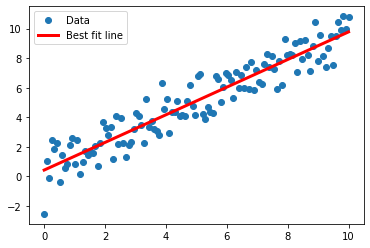

In [16]:
best_fit = []
for i in x_vals:
 best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.show()

# Learning The TensorFlow Way of Linear Regression

In [0]:
#loading libraries 
import matplotlib.pyplot as plt
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

#creating graph
ops.reset_default_graph()

#intiliasing session
sess = tf.Session()

#loading dataset
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])


In [0]:
#declaring learning rate
learning_rate = 0.05

#declaring batch size
batch_size = 25

#declaring placeholders
x_data = tf.placeholder(shape= [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype =  tf.float32)

#declaring model variables
A = tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))


In [0]:
#writing folmula y = Ax+b
model_output = tf.add(tf.multiply(x_data, A), b)

In [0]:
#decalring L2 loss function (which includes mean over the batch)
loss = tf.reduce_mean(tf.square(y_target - model_output))

#intialising the variable
init = tf.global_variables_initializer()
sess.run(init)

#delaring the optimiser
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [39]:
loss_vec= []
for i in range(100):
  rand_index = np.random.choice(len(x_vals), size = batch_size)
  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])
  sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
  temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
  loss_vec.append(temp_loss)
  if (i+1)%25==0:
    print('Step #' , str(i+1) , ' A = ' , str(sess.run(A)) , 'b = ' , str(sess.run(b)))
    print('Loss = ''' , str(temp_loss))

Step # 25  A =  [[2.0153759]] b =  [[3.103171]]
Loss =  0.83587545
Step # 50  A =  [[1.5687429]] b =  [[3.7782903]]
Loss =  0.57700366
Step # 75  A =  [[1.2451531]] b =  [[4.1679306]]
Loss =  0.46359903
Step # 100  A =  [[1.1335193]] b =  [[4.443145]]
Loss =  0.29937786


In [0]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
 best_fit.append(slope*i+y_intercept)

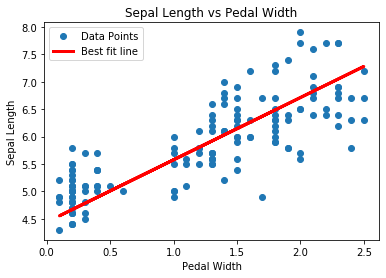

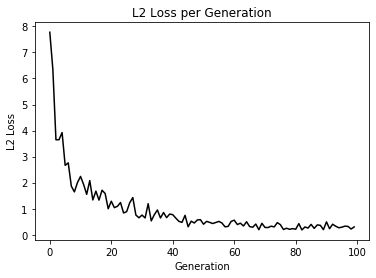

In [45]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()